In [1]:
import pandas as pnd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import os
import pickle

In [5]:
df = pnd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

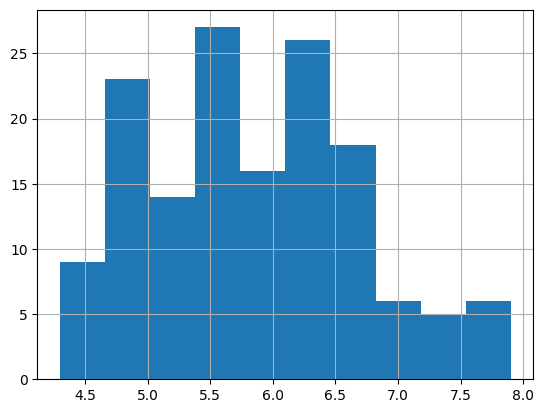

In [10]:
df['sepal_length'].hist()

<Axes: >

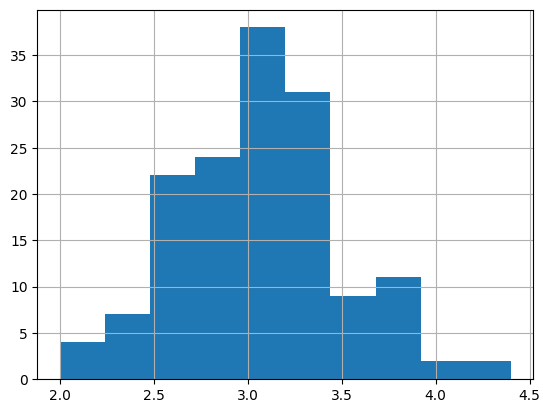

In [11]:
df['sepal_width'].hist()

<Axes: >

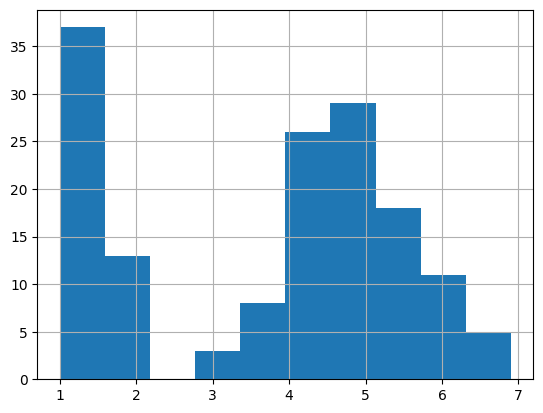

In [12]:
df['petal_length'].hist()

<Axes: >

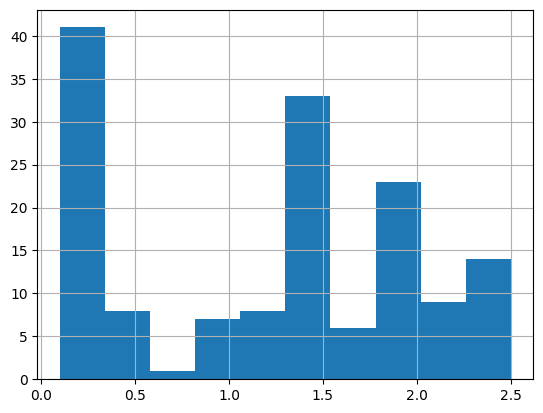

In [13]:
df['petal_width'].hist()

In [14]:
colors = ['orange','blue','green']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

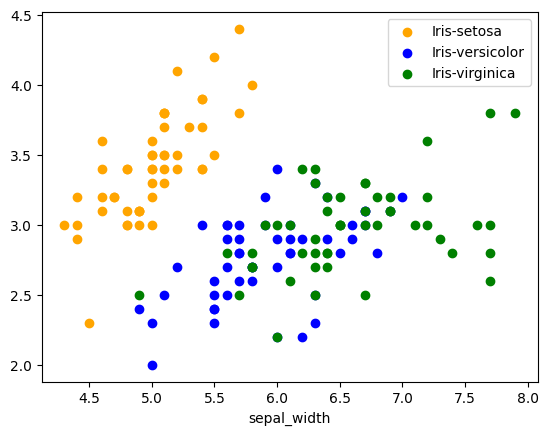

In [15]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c= colors[i], label = species[i])
plt.xlabel('sepal_length')
plt.xlabel('sepal_width')
plt.legend()

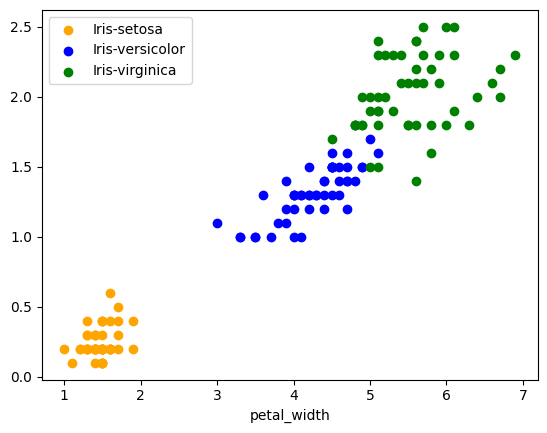

In [16]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c= colors[i], label = species[i])
plt.xlabel('petal_length')
plt.xlabel('petal_width')
plt.legend()

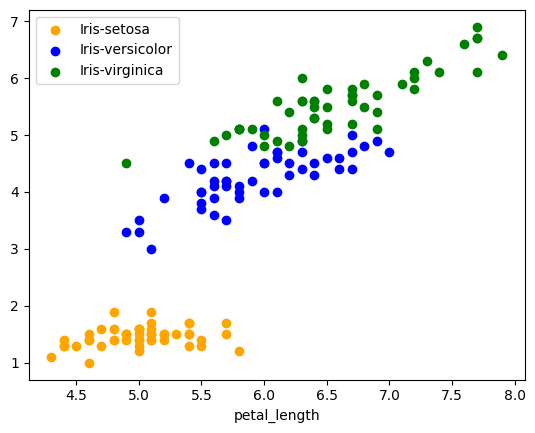

In [17]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c= colors[i], label = species[i])
plt.xlabel('sepal_length')
plt.xlabel('petal_length')
plt.legend()

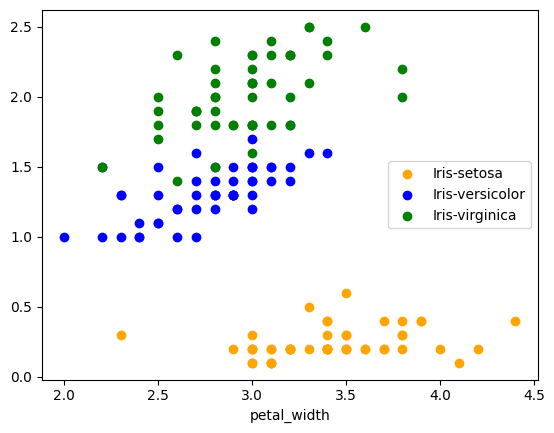

In [18]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c= colors[i], label = species[i])
plt.xlabel('sepal_width')
plt.xlabel('petal_width')
plt.legend()

In [19]:
from sklearn.preprocessing import LabelEncoder
leb = LabelEncoder()

In [20]:
df['species'] = leb.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

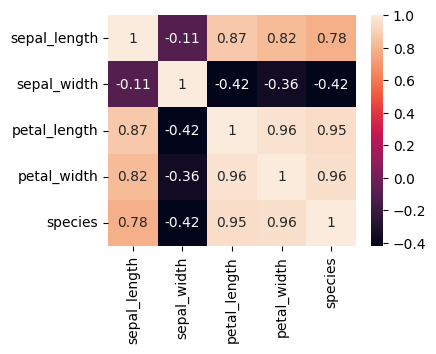

In [22]:
corr = df.corr()
fig, ax = plt.subplots(figsize =(4,3))
sea.heatmap(corr, annot=True , ax=ax)

In [23]:
# MODEL TRAINING

from sklearn.model_selection import train_test_split
X = df.drop(columns = ['species'])
Y = df['species']
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.40)

In [24]:

# Logistic regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
print('Accuracy :', model.score(x_test, y_test)*100)

Accuracy : 91.66666666666666


In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [28]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
print('Accuracy :', model.score(x_test, y_test)*100)

Accuracy : 95.0


Decision Tree 

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [31]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
print('Accuracy :', model.score(x_test, y_test)*100)

Accuracy : 88.33333333333333


In [33]:
import pickle
filename = 'irismodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [34]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
116,6.5,3.0,5.5,1.8
137,6.4,3.1,5.5,1.8
7,5.0,3.4,1.5,0.2
83,6.0,2.7,5.1,1.6


In [35]:
load_model = pickle.load(open(filename, 'rb'))

In [36]:
class_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [37]:
predicted_class = load_model.predict([[3.0,2.0,5.0,4.0]])[0]
species_name = class_mapping[predicted_class]
print('Predicted Species : ', species_name)


Predicted Species :  Iris-virginica


c:\Users\mayur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#CodSoft (Data Science)
Task : Iris Flower Classification

Name : Mayur_Jivan_Hebade
Email ID : mayur62987jhebade@gmail.com
contact : 8421751878